In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("dataset.csv")
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [7]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64


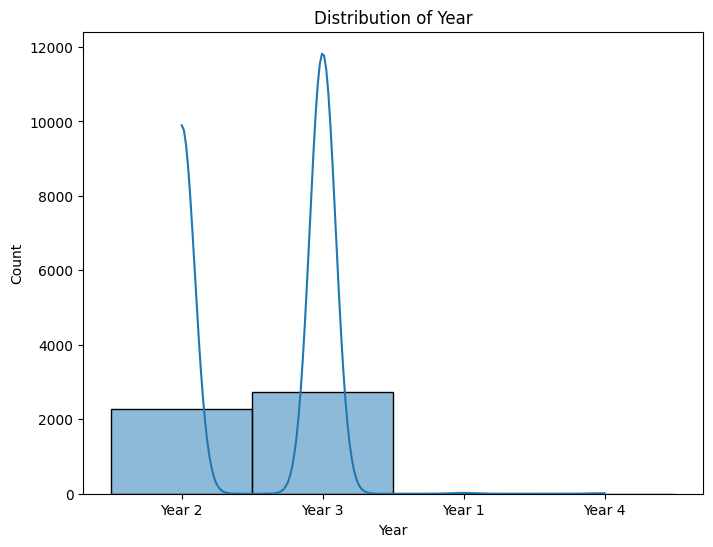

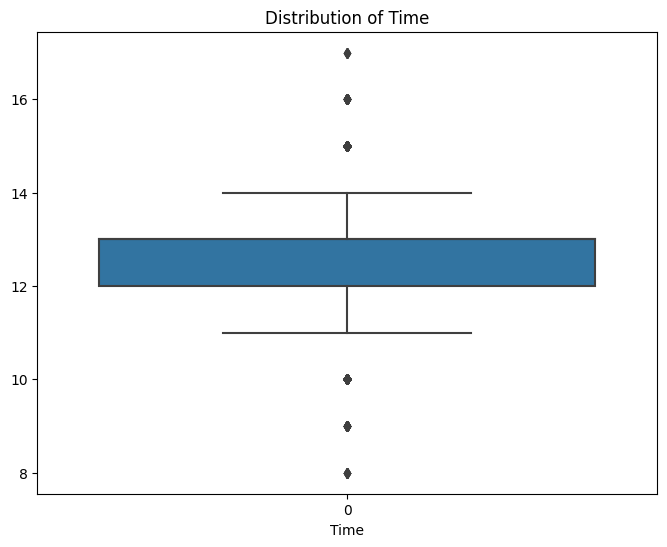

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Year' using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()

# Visualize the distribution of 'Time' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df['Time'])
plt.xlabel('Time')
plt.title('Distribution of Time')
plt.show()

# these visualizations will help us understand the dataset much better and later make decisions using it.

In [9]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
X = df[['Year', 'Major', 'University', 'Time']].copy()  # Create a copy of the DataFrame
y = df['Order']

# Encoding categorical features
label_encoders = {}
for column in ['Year', 'Major', 'University']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with a Random Forest Classifier
model = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

In [16]:
import joblib

# Train the model
model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(model, 'order_prediction_model.pkl')

['order_prediction_model.pkl']

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Model Evaluation:
Accuracy: 0.651
Confusion Matrix:
[[43  7  6  0  2 12  6  5  1 12]
 [ 4 73  3  3 10  5  1 10  0  3]
 [ 8 13 59  2  2  1  4  0 16  2]
 [ 0  0  0 67 10  0  1  7 17  1]
 [ 0 10  2  8 55  4  1  3  1  9]
 [ 3  2  0  0  0 71  6  0  0  2]
 [ 3  2  1  0  1  2 83  1  0  2]
 [ 3  7  1 16  5  5  6 63  0  4]
 [ 2  8  7  4  2  0  2 11 59  3]
 [ 4  5  3  2  2  5  0  2  3 78]]
Classification Report:
                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.61      0.46      0.52        94
                                  Cornbread Hush Puppies       0.57      0.65      0.61       112
                                    Fried Catfish Basket       0.72      0.55      0.62       107
                        Hoosier BBQ Pulled Pork Sandwich       0.66      0.65      0.65       103
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.62      0.59      0.60        93
    I